In [16]:
import pandas as pd
from pymongo import MongoClient
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../statistical_calculations')  # Adds the statistical_calculations directory to the path
import disproportionaly_analysis
from tqdm import tqdm

client = MongoClient('mongodb://localhost:27017/')
db = client['vaers']  
collection = db['combinations cleaned']

In [17]:
Pfizer_adverse_reactions = [
    "Vomiting",
    "Lymphadenopathy",
    "Rash", 
    "Pruritus", 
    "Urticaria", 
    "Angioedema",
    "Anaphylaxis",
    "Decreased appetite",
    "Insomnia",
    "Headache",
    "Dizziness",
    "Lethargy",
    #"Acute peripheral facial paralysis",
    "Facial paralysis",
    "Paraesthesia",
    "Hypoaesthesia",
    "Myocarditis",
    "Pericarditis",
    "Diarrhoea",
    "Nausea",
    "Hyperhidrosis",
    "Night sweats",
    "Erythema multiforme",
    "Arthralgia",
    "Myalgia",
    "Pain in extremity",
    "Heavy menstrual bleeding",
    "Injection site pain",
    "Fatigue",
    "Chills",
    "Pyrexia",
    "Injection site swelling",
    "Injection site redness",
    "Asthenia",
    "Malaise",
    "Injection site pruritus",
    "Extensive swelling of vaccinated limb",
    "Facial swelling"
]

In [18]:
Moderna_adverse_reactions = [
    "Lymphadenopathy",
    "Anaphylaxis",
    "Hypersensitivity",
    "Decreased appetite",
    "Irritability", 
    "Crying",
    "Headache",
    "Sleepiness",
    "Dizziness",
    #"Acute peripheral facial paralysis",
    "Facial paralysis", #instead of facial paralysis
    "Hypoaesthesia",
    "Paraesthesia",
    "Myocarditis",
    "Pericarditis",
    "Nausea", 
    "Vomiting",
    "Diarrhoea",
    "Abdominal pain",
    "Rash",
    "Urticaria",
    "Erythema multiforme",
    "Mechanical urticaria",
    "Chronic urticaria",
    "Myalgia",
    "Arthralgia",
    "Heavy menstrual bleeding",
    "Injection site pain",
    "Fatigue",
    "Chills",
    "Pyrexia",
    "Injection site swelling",
    "Injection site erythema",
    "Injection site urticaria",
    "Injection site rash",
    "Delayed injection site reaction",
    "Injection site pruritus",
    "Facial swelling",
    "Extensive swelling of vaccinated limb"
]


In [19]:
Janssen_adverse_reactions = [
    "Lymphadenopathy",
    "Immune thrombocytopenia",
    "Anaphylaxis",
    "Headache",
    "Dizziness",
    "Tremor",
    "Urticaria",
    "Hypersensitivity",
    "Paraesthesia",
    "Hypoaesthesia",
    "Facial paralysis",
    "Tinnitus",
    "Guillain-Barre syndrome",
    #"Transverse myelitis", not in DB
    "Myelitis", #instead of Transverse myelitis
    "Venous thromboembolism",
    "Thrombosis in combination with thrombocytopenia",
    "Myocarditis", 
    "Pericarditis",
    "Capillary leak syndrome",
    #"Small vessel cutaneous vasculitis", not in DB
    "Cutaneous vasculitis", #instead of Small vessel cutaneous vasculitis"
    "Nausea",
    "Cough", 
    "Oropharyngeal pain",
    "Sneezing",
    "Diarrhoea",
    "Vomiting",
    "Rash",
    "Hyperhidrosis",
    "Myalgia",
    "Arthralgia",
    "Muscular weakness",
    "Back pain",
    "Pain in extremity",
    "Fatigue",
    "Injection site pain",
    "Injection site swelling",
    "Chills",
    "Pyrexia"
]

In [20]:
Novavax_adverse_reactions = [
    "Headache",
    "Nausea",
    "Vomiting",
    "Myalgia",
    "Arthralgia",
    "Injection site tenderness",
    "Injection site pain",
    "Fatigue",
    "Malaise",
    "Injection site redness",
    "Injection site swelling",
    "Pyrexia",
    "Pain in extremity",
    "Injection site pruritus",
    "Chills",
    "Injection site warmth",
    "Lymphadenopathy",
    "Anaphylaxis",
    "Paraesthesia",
    "Hypoaesthesia",
    "Myocarditis",
    "Pericarditis",
    "Hypertension",
    "Rash",
    "Erythema",
    "Pruritus",
    "Urticaria"
]

In [21]:
json_path = '~/Documents/Masterarbeit/Best_method_evaluation/E_rate_lt10.json'
data = pd.read_json(json_path, orient='records')

In [22]:
symptom_dict = data.to_dict(orient='records')

In [23]:
symptom_dict

[{'symptom': 'Varicella zoster virus infection',
  'manufacturer': 'JANSSEN',
  'E_rate': 0.0182481752},
 {'symptom': 'Rheumatoid factor negative',
  'manufacturer': 'JANSSEN',
  'E_rate': 0.0276179517},
 {'symptom': 'Pityriasis rosea',
  'manufacturer': 'JANSSEN',
  'E_rate': 0.0365853659},
 {'symptom': 'Bronchiolitis',
  'manufacturer': 'MODERNA',
  'E_rate': 0.0272435897},
 {'symptom': 'Chorioretinopathy',
  'manufacturer': 'JANSSEN',
  'E_rate': 0.037037037},
 {'symptom': 'Injection site pain',
  'manufacturer': 'NOVAVAX',
  'E_rate': 0.0001489416},
 {'symptom': 'Rash maculo-papular',
  'manufacturer': 'MODERNA',
  'E_rate': 0.027248305},
 {'symptom': 'Soft tissue inflammation',
  'manufacturer': 'MODERNA',
  'E_rate': 0.0833333333},
 {'symptom': 'Anti-thyroid antibody',
  'manufacturer': 'JANSSEN',
  'E_rate': 0.024561403500000002},
 {'symptom': 'Rash morbilliform',
  'manufacturer': 'JANSSEN',
  'E_rate': 0.0098113208},
 {'symptom': 'Faeces soft', 'manufacturer': 'JANSSEN', 'E_ra

In [24]:
y_true = []
rrr_chi2 = []
rrr_ci = []
prr_chi2 = []
prr_ci = []
ror_chi2 = []
ror_ci = []
ic_chi2 = []
ic_ci = []
order = []

for entry in tqdm(symptom_dict):
    query = {"manufacturer": entry["manufacturer"],
             "symptom": entry["symptom"]}
    result = list(collection.find(query))
    DE = result[0]["DE"]
    if DE >=3:
        dE = result[0]["dE"]
        De = result[0]["De"]
        de = result[0]["de"]
        
        # Ensure all necessary data is available
        if None in [DE, dE, De, de]:
            continue
        
        contingency_table = [
            [DE, dE],
            [De, de]
        ]
        
        # Compute statistical measures
        rrr, sd_rrr = disproportionaly_analysis.relative_reporting_ratio(contingency_table), disproportionaly_analysis.sd_rrr(contingency_table)
        rrr_ci_lower, rrr_ci_upper = disproportionaly_analysis.confidence_interval(rrr, sd_rrr)
        
        prr, sd_prr = disproportionaly_analysis.proportional_reporting_ratio(contingency_table), disproportionaly_analysis.sd_prr(contingency_table)
        prr_ci_lower, prr_ci_upper = disproportionaly_analysis.confidence_interval(prr, sd_prr)
        
        ror, sd_ror = disproportionaly_analysis.reporting_odds_ratio(contingency_table), disproportionaly_analysis.sd_ror(contingency_table)
        ror_ci_lower, ror_ci_upper = disproportionaly_analysis.confidence_interval(ror, sd_ror)
        
        chi_square = disproportionaly_analysis.chi_square_yates(contingency_table)
        IC = disproportionaly_analysis.information_component(contingency_table)
        IC_ci_lower, IC_ci_upper = disproportionaly_analysis.confidence_interval_information_component(contingency_table, IC)
        
        order.append([result[0]["symptom"], result[0]["manufacturer"]])
        
        if  result[0]["manufacturer"] == "PFIZER\\BIONTECH":
            if  result[0]["symptom"] in Pfizer_adverse_reactions:      
                y_true.append(1)
            else:
                y_true.append(0)
        
        if  result[0]["manufacturer"] == "MODERNA":
            if  result[0]["symptom"] in Moderna_adverse_reactions:      
                y_true.append(1)
            else:
                y_true.append(0)
                
        if  result[0]["manufacturer"] == "JANSSEN":
            if  result[0]["symptom"] in Janssen_adverse_reactions:      
                y_true.append(1)
            else:
                y_true.append(0)
        
        if  result[0]["manufacturer"] == "NOVAVAX":
            if  result[0]["symptom"] in Novavax_adverse_reactions:      
                y_true.append(1)
            else:
                y_true.append(0)
            
        # CHI SQUARE METHODS        
        if rrr > 2 and chi_square > 3.841:
            rrr_chi2.append(1)
        else:
            rrr_chi2.append(0)
            
        if prr > 2 and chi_square > 3.841:
            prr_chi2.append(1)
        else:
            prr_chi2.append(0)
        
        if ror > 2 and chi_square > 3.841:
            ror_chi2.append(1)
        else:
            ror_chi2.append(0)
        
        if IC > 0 and chi_square > 3.841: #efbedingung?
            ic_chi2.append(1)
        else: 
            ic_chi2.append(0)
            
        # CI METHODS
        
        if rrr_ci_lower > 1:
            rrr_ci.append(1)
        else:
            rrr_ci.append(0)
            
        if prr_ci_lower > 1:
            prr_ci.append(1)
        else:
            prr_ci.append(0)
        
        if ror_ci_lower > 1:
            ror_ci.append(1)
        else:
            ror_ci.append(0)
        
        if IC_ci_lower > 0:
            ic_ci.append(1)
        else: 
            ic_ci.append(0)
    

100%|██████████| 4501/4501 [03:06<00:00, 24.15it/s]


In [25]:
len(y_true)

4501

In [26]:
#Accuracy
rrr_chi2_accuracy = accuracy_score(y_true, rrr_chi2)
rrr_ci_accuracy = accuracy_score(y_true, rrr_ci)

prr_chi2_accuracy = accuracy_score(y_true, prr_chi2)
prr_ci_accuracy = accuracy_score(y_true, prr_ci)

ror_chi2_accuracy = accuracy_score(y_true, ror_chi2)
ror_ci_accuracy = accuracy_score(y_true, ror_ci)

ic_chi2_accuracy = accuracy_score(y_true, ic_chi2)
ic_ci_accuracy = accuracy_score(y_true, ic_ci)

#Precision
rrr_chi2_precision = precision_score(y_true, rrr_chi2)
rrr_ci_precision = precision_score(y_true, rrr_ci)

prr_chi2_precision = precision_score(y_true, prr_chi2)
prr_ci_precision = precision_score(y_true, prr_ci)

ror_chi2_precision = precision_score(y_true, ror_chi2)
ror_ci_precision = precision_score(y_true, ror_ci)

ic_chi2_precision = precision_score(y_true, ic_chi2)
ic_ci_precision = precision_score(y_true, ic_ci)

#F1 Score
rrr_chi2_f1 = f1_score(y_true, rrr_chi2)
rrr_ci_f1 = f1_score(y_true, rrr_ci)

prr_chi2_f1 = f1_score(y_true, prr_chi2)
prr_ci_f1 = f1_score(y_true, prr_ci)

ror_chi2_f1 = f1_score(y_true, ror_chi2)
ror_ci_f1 = f1_score(y_true, ror_ci)

ic_chi2_f1 = f1_score(y_true, ic_chi2)
ic_ci_f1 = f1_score(y_true, ic_ci)

#Recall
rrr_chi2_recall = recall_score(y_true, rrr_chi2)
rrr_ci_recall = recall_score(y_true, rrr_ci)

prr_chi2_recall = recall_score(y_true, prr_chi2)
prr_ci_recall = recall_score(y_true, prr_ci)

ror_chi2_recall = recall_score(y_true, ror_chi2)
ror_ci_recall = recall_score(y_true, ror_ci)

ic_chi2_recall = recall_score(y_true, ic_chi2)
ic_ci_recall = recall_score(y_true, ic_ci)

#Roc Auc
rrr_chi2_rocauc = roc_auc_score(y_true, rrr_chi2)
rrr_ci_rocauc = roc_auc_score(y_true, rrr_ci)

prr_chi2_rocauc = roc_auc_score(y_true, prr_chi2)
prr_ci_rocauc = roc_auc_score(y_true, prr_ci)

ror_chi2_rocauc = roc_auc_score(y_true, ror_chi2)
ror_ci_rocauc = roc_auc_score(y_true, ror_ci)

ic_chi2_rocauc = roc_auc_score(y_true, ic_chi2)
ic_ci_rocauc = roc_auc_score(y_true, ic_ci)

#Confusion matrix
rrr_chi2_cm = confusion_matrix(y_true, rrr_chi2)
rrr_ci_cm = confusion_matrix(y_true, rrr_ci)

prr_chi2_cm = confusion_matrix(y_true, prr_chi2)
prr_ci_cm = confusion_matrix(y_true, prr_ci)

ror_chi2_cm = confusion_matrix(y_true, ror_chi2)
ror_ci_cm = confusion_matrix(y_true, ror_ci)

ic_chi2_cm = confusion_matrix(y_true, ic_chi2)
ic_ci_cm = confusion_matrix(y_true, ic_ci)

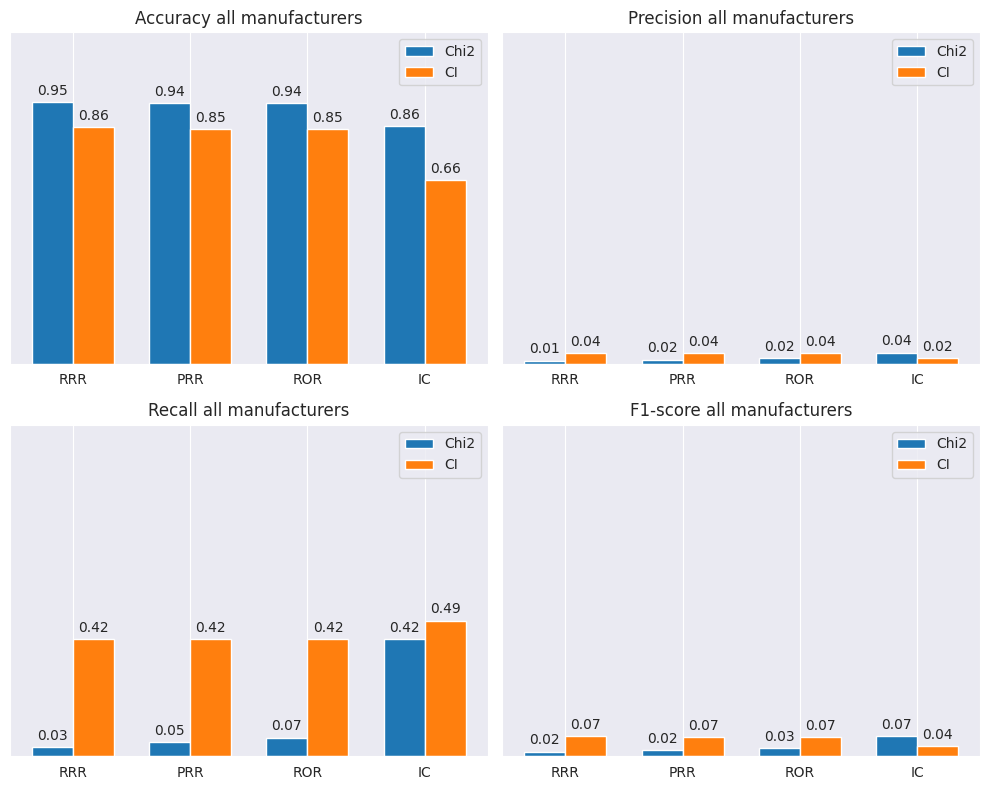

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
methods = ['RRR', 'PRR', 'ROR', 'IC']

chi2_accuracies = [rrr_chi2_accuracy, prr_chi2_accuracy, ror_chi2_accuracy, ic_chi2_accuracy]
ci_accuracies = [rrr_ci_accuracy, prr_ci_accuracy, ror_ci_accuracy, ic_ci_accuracy]

chi2_precisions = [rrr_chi2_precision, prr_chi2_precision, ror_chi2_precision, ic_chi2_precision]
ci_precisions = [rrr_ci_precision, prr_ci_precision, ror_ci_precision, ic_ci_precision]

chi2_recalls = [rrr_chi2_recall, prr_chi2_recall, ror_chi2_recall, ic_chi2_recall]
ci_recalls = [rrr_ci_recall, prr_ci_recall, ror_ci_recall, ic_ci_recall]

chi2_f1s = [rrr_chi2_f1, prr_chi2_f1, ror_chi2_f1, ic_chi2_f1]
ci_f1s = [rrr_ci_f1, prr_ci_f1, ror_ci_f1, ic_ci_f1]
# Plotting function for subplots
def plot_metric_subplot(ax, metric_name, chi2_values, ci_values):
    x = np.arange(len(methods))  # the label locations
    width = 0.35  # the width of the bars

    bars1 = ax.bar(x - width/2, chi2_values, width, label='Chi2')
    bars2 = ax.bar(x + width/2, ci_values, width, label='CI')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(f'{metric_name} all manufacturers')
    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    ax.legend()

    # Setting the y-axis limit to 1.2 and removing the y-axis annotation
    ax.set_ylim(0, 1.2)
    ax.yaxis.set_visible(False)

    # Function to add a value label on each bar, rotated 90 degrees
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_labels(bars1)
    add_labels(bars2)

# Plotting accuracy, precision, recall, and f1-score in subplots
plot_metric_subplot(axs[0, 0], 'Accuracy', chi2_accuracies, ci_accuracies)
plot_metric_subplot(axs[0, 1], 'Precision', chi2_precisions, ci_precisions)
plot_metric_subplot(axs[1, 0], 'Recall', chi2_recalls, ci_recalls)
plot_metric_subplot(axs[1, 1], 'F1-score', chi2_f1s, ci_f1s)

plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/All_data/method_evaluation_E-rate_lt10.pdf')
plt.show()


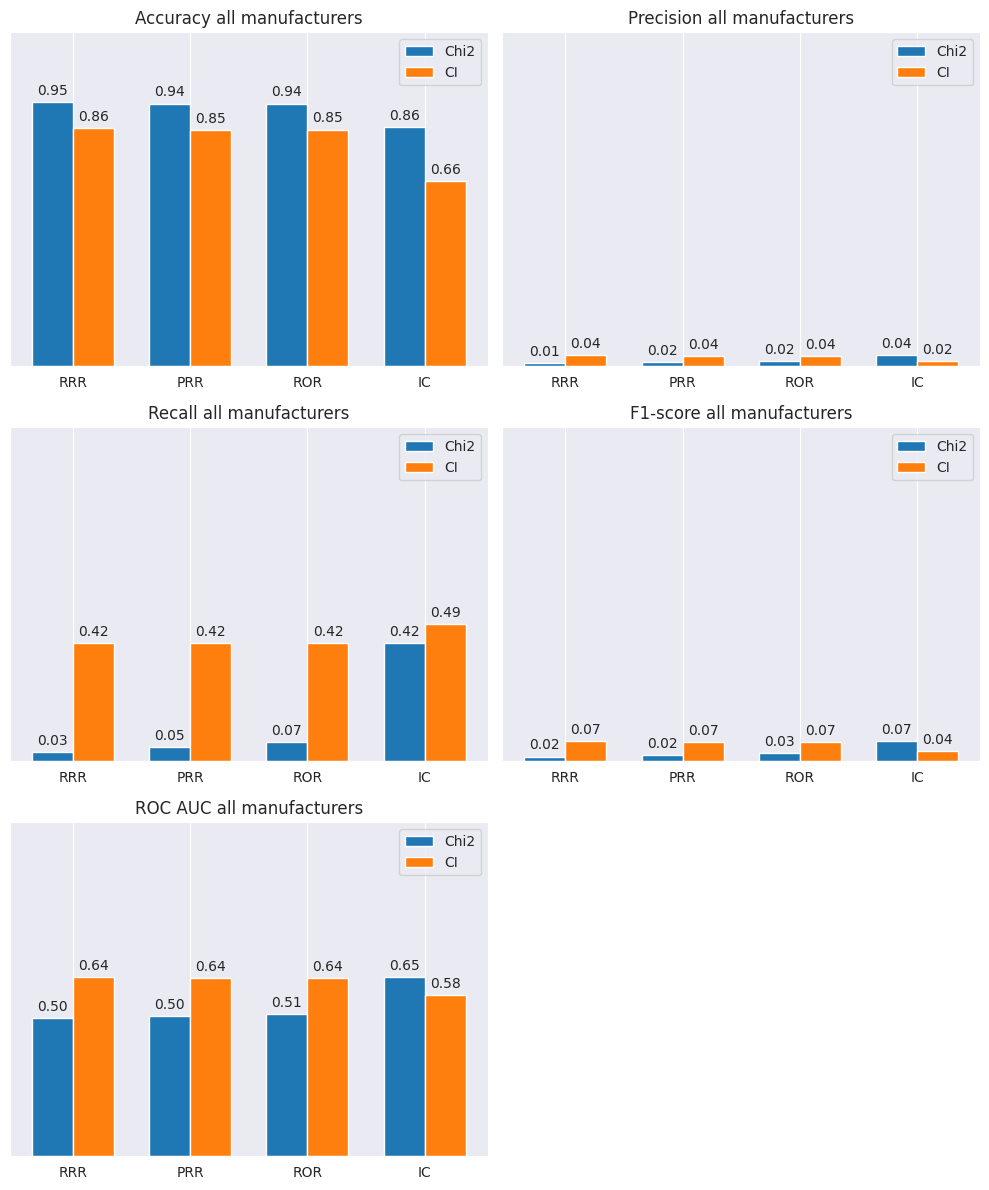

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2, figsize=(10, 12))
methods = ['RRR', 'PRR', 'ROR', 'IC']

chi2_accuracies = [rrr_chi2_accuracy, prr_chi2_accuracy, ror_chi2_accuracy, ic_chi2_accuracy]
ci_accuracies = [rrr_ci_accuracy, prr_ci_accuracy, ror_ci_accuracy, ic_ci_accuracy]

chi2_precisions = [rrr_chi2_precision, prr_chi2_precision, ror_chi2_precision, ic_chi2_precision]
ci_precisions = [rrr_ci_precision, prr_ci_precision, ror_ci_precision, ic_ci_precision]

chi2_recalls = [rrr_chi2_recall, prr_chi2_recall, ror_chi2_recall, ic_chi2_recall]
ci_recalls = [rrr_ci_recall, prr_ci_recall, ror_ci_recall, ic_ci_recall]

chi2_f1s = [rrr_chi2_f1, prr_chi2_f1, ror_chi2_f1, ic_chi2_f1]
ci_f1s = [rrr_ci_f1, prr_ci_f1, ror_ci_f1, ic_ci_f1]

chi2_roc_aucs = [rrr_chi2_rocauc, prr_chi2_rocauc, ror_chi2_rocauc, ic_chi2_rocauc]
ci_roc_aucs = [rrr_ci_rocauc, prr_ci_rocauc, ror_ci_rocauc, ic_ci_rocauc]

# Plotting function for subplots
def plot_metric_subplot(ax, metric_name, chi2_values, ci_values):
    x = np.arange(len(methods))  # the label locations
    width = 0.35  # the width of the bars

    bars1 = ax.bar(x - width/2, chi2_values, width, label='Chi2')
    bars2 = ax.bar(x + width/2, ci_values, width, label='CI')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(f'{metric_name} all manufacturers')
    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    ax.legend()

    # Setting the y-axis limit to 1.2 and removing the y-axis annotation
    ax.set_ylim(0, 1.2)
    ax.yaxis.set_visible(False)

    # Function to add a value label on each bar, rotated 90 degrees
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom'
                        )

    add_labels(bars1)
    add_labels(bars2)

# Plotting accuracy, precision, recall, f1-score, and roc-auc in subplots
plot_metric_subplot(axs[0, 0], 'Accuracy', chi2_accuracies, ci_accuracies)
plot_metric_subplot(axs[0, 1], 'Precision', chi2_precisions, ci_precisions)
plot_metric_subplot(axs[1, 0], 'Recall', chi2_recalls, ci_recalls)
plot_metric_subplot(axs[1, 1], 'F1-score', chi2_f1s, ci_f1s)
plot_metric_subplot(axs[2, 0], 'ROC AUC', chi2_roc_aucs, ci_roc_aucs)

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/All_data/method_evaluation_E-rate_lt10.pdf')
plt.show()


In [13]:
result = sum(1 for val in y_true if val == 1)

In [14]:
result

59

In [15]:
59/4501

0.013108198178182626